In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# # Split the DataFrame based on the target value
# df_target_0 = df[df['drug_like'] == 0]
# df_target_1 = df[df['drug_like'] == 1]

In [3]:
df

NameError: name 'df' is not defined

In [ ]:
# Get the list of column names (headers)
headers = df.columns.tolist()

# Save the headers to a text file
with open('/kaggle/working/headers.txt', 'w') as f:
    for header in headers:
        f.write(f"{header}\n")

In [ ]:
!pip install torch-geometric

In [ ]:
import pandas as pd
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_mean_pool

In [ ]:
# Load the dataset
df = pd.read_csv('/kaggle/input/created-model-overnight-500-epochs/output.csv')


In [ ]:
df

In [ ]:
!pip install rdkit-pypi

In [ ]:
import torch
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data

In [ ]:
# def mol_to_graph(smiles, features):
#     mol = Chem.MolFromSmiles(smiles)
#     mol = Chem.AddHs(mol)
#     AllChem.EmbedMolecule(mol)
#     AllChem.MMFFOptimizeMolecule(mol)

#     # Get node features
#     atom_features = []
#     for atom in mol.GetAtoms():
#         atom_feature = [atom.GetAtomicNum(), atom.GetFormalCharge()]
#         atom_feature.extend(features)  # Include additional feature variables
#         atom_features.append(atom_feature)

#     # Get edge indices
#     edge_indices = []
#     for bond in mol.GetBonds():
#         start_idx = bond.GetBeginAtomIdx()
#         end_idx = bond.GetEndAtomIdx()
#         edge_indices.extend([(start_idx, end_idx), (end_idx, start_idx)])

#     x = torch.tensor(atom_features, dtype=torch.float)
#     edge_index = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()

#     # Create a PyTorch Geometric Data object
#     data = Data(x=x, edge_index=edge_index)

#     return data

In [ ]:
nan_count_per_column = df.isna().sum()
print("Number of NaN values in each column:")
print(nan_count_per_column)

In [ ]:
# Select all columns except the first one
columns_to_fill = df.columns[1:]

# Fill NaN values with the mean for these columns
df[columns_to_fill] = df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

# Print the DataFrame to verify the changes
print(df)

In [ ]:
df

In [ ]:
# def mol_to_graph(smiles, features):
#     mol = Chem.MolFromSmiles(smiles)
#     mol = Chem.AddHs(mol)

#     try:
#         AllChem.EmbedMolecule(mol)
#         AllChem.MMFFOptimizeMolecule(mol)
#     except:
#         pass

#     # Get node features
#     atom_features = []
#     for atom in mol.GetAtoms():
#         atom_feature = [atom.GetAtomicNum(), atom.GetFormalCharge()]
#         atom_feature.extend(features)  # Include additional feature variables
#         atom_features.append(atom_feature)

#     # Get edge indices
#     edge_indices = []
#     for bond in mol.GetBonds():
#         start_idx = bond.GetBeginAtomIdx()
#         end_idx = bond.GetEndAtomIdx()
#         edge_indices.extend([(start_idx, end_idx), (end_idx, start_idx)])

#     x = torch.tensor(atom_features, dtype=torch.float)
#     edge_index = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()

#     # Create a PyTorch Geometric Data object
#     data = Data(x=x, edge_index=edge_index)

#     return data

In [4]:
# # Convert SMILES to molecular graphs
# graphs = [mol_to_graph(s, f) for s, f in zip(smiles, features)]

In [5]:
# graphs

In [6]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv


ModuleNotFoundError: No module named 'torch_geometric'

In [ ]:
# # Load your DataFrame
# df = pd.read_csv('/kaggle/input/top-100-descriptors-rfe/output.csv')

# Extract the SMILES strings
smiles_list = df['SMILES'].tolist()

# Extract the feature variables
feature_columns = df.columns.difference(['SMILES', 'drug_like'])
feature_list = df[feature_columns].values.tolist()

In [12]:
# Print the length of the first 5 feature rows
for i in range(5):
    print(f"Length of feature row {i+1}: {len(feature_list[i])}")

Length of feature row 1: 100
Length of feature row 2: 100
Length of feature row 3: 100
Length of feature row 4: 100
Length of feature row 5: 100


In [13]:
# Extract the target labels (last column)
targets = df['drug_like'].tolist()

In [14]:
len(targets)

4179

In [15]:
type(feature_list)

list

# Error Checking

In [16]:
# Assuming `smiles_list` is your list of SMILES strings, `feature_list` is your list of feature lists,
# and `targets` is your list of target labels (0 or 1)
data_list_0 = []
data_list_1 = []

In [17]:
print(set(type(t) for t in targets))

{<class 'int'>}


## updated mol_to_graph

In [18]:
from rdkit import Chem
from rdkit.Chem import AllChem
import torch
from torch_geometric.data import Data

def mol_to_graph(smiles, features, target):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"Invalid SMILES: {smiles}")
        return None
    
    mol = Chem.AddHs(mol)
    try:
        AllChem.EmbedMolecule(mol)
        AllChem.MMFFOptimizeMolecule(mol)
    except Exception as e:
        print(f"Error in molecule embedding/optimization for {smiles}: {e}")
    
    atom_features = []
    for atom in mol.GetAtoms():
        atom_feature = [atom.GetAtomicNum(), atom.GetFormalCharge()]
        atom_feature.extend(features)
        atom_features.append(atom_feature)
    
    edge_indices = []
    for bond in mol.GetBonds():
        start_idx = bond.GetBeginAtomIdx()
        end_idx = bond.GetEndAtomIdx()
        edge_indices.extend([(start_idx, end_idx), (end_idx, start_idx)])
    
    x = torch.tensor(atom_features, dtype=torch.float)
    edge_index = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()
    
    # Convert target to tensor
    y = torch.tensor([target], dtype=torch.long)
    
    # Create the Data object with all attributes
    data = Data(x=x, edge_index=edge_index, y=y)
    
#     # Print debug information
#     print(f"SMILES: {smiles}")
#     print(f"Target: {target}")
#     print(f"Graph y: {data.y.item()}")
#     print(f"Graph shape: x={data.x.shape}, edge_index={data.edge_index.shape}")
#     print("---")
    
    return data

# Usage in your main code:
data_list = []
for smiles, feature, target in zip(smiles_list, feature_list, targets):
    graph = mol_to_graph(smiles, feature, target)
    if graph is not None:
        data_list.append(graph)

Error in molecule embedding/optimization for CCCCCCCCCCCCCCCC(=O)OC[C@@H](OC(=O)CCCCCCCCCCCCCCC)COP(=O)(OCC[N+](C)(C)C)[O-]: Bad Conformer Id


[04:33:10] UFFTYPER: Unrecognized hybridization for atom: 8
[04:33:10] UFFTYPER: Unrecognized atom type: Pt+2 (8)
[04:33:10] UFFTYPER: Unrecognized hybridization for atom: 1
[04:33:10] UFFTYPER: Unrecognized atom type: Ni+2 (1)


Error in molecule embedding/optimization for C=C1[C@H]2CC[C@@H]3[C@](C1=O)([C@@H]2O)CC[C@H]1[C@@]3(C)CCCC1(C)C: Bad Conformer Id
Error in molecule embedding/optimization for COc1cc(/C=C/C(=O)OC[C@@]2(O[C@H]3O[C@H](COC(=O)/C=C/c4ccc(c(c4)OC)O)[C@H]([C@@H]([C@H]3O)O)O)O[C@@H]([C@H]([C@@H]2OC(=O)/C=C/c2ccc(cc2)O)O)COC(=O)/C=C/c2ccc(cc2)O)ccc1O: Bad Conformer Id
Error in molecule embedding/optimization for OC[C@H]1O[C@@H](O[C@@H]2CO[C@H]([C@@H]([C@H]2O)O[C@@H]2O[C@H](CO[C@@H]3O[C@H](CO)[C@H]([C@@H]([C@H]3O[C@@H]3O[C@H](CO)[C@H]([C@@H]([C@H]3O)O)O)O)O)[C@H]([C@@H]([C@H]2N=C(O)C)O)O)O[C@H]2CC[C@]3([C@H](C2(C)C)CCC2=C3CC[C@]3([C@H]2CC[C@@H]3[C@@H](CC(=O)C=C(C)C)C)C)C)[C@@H]([C@H]([C@H]1O)O)N=C(O)C: Bad Conformer Id
Error in molecule embedding/optimization for CCCCCCCCCC(=O)O[C@@H]1[C@@H](O[C@@H]2O[C@@H](C)[C@@H]([C@H]([C@H]2OC(=O)/C=C/c2ccccc2)O)OC(=O)CCCCCCCCCCC)[C@H](C)O[C@H]([C@@H]1O)O[C@H]1[C@H](C)O[C@@H]2[C@@H]([C@@H]1O)OC(=O)CCCCCCCCC[C@@H](O[C@H]1[C@H](O2)[C@@H](O)[C@H]([C@H](O1)C)O)CC

[04:35:08] UFFTYPER: Unrecognized charge state for atom: 7


Error in molecule embedding/optimization for CC(=O)O[C@@H]1[C@@H]2CC[C@@H]3[C@]1([C@H](O)C[C@H]1[C@@]3(C)CCCC1(C)C)C(=O)C2=C: Bad Conformer Id
Error in molecule embedding/optimization for OC1O[C@H](COC(=O)c2cc(O)c(c(c2)O)O)[C@H]([C@@H]([C@H]1OC(=O)c1cc(O)c(c(c1)O)O)OC(=O)c1cc(O)c(c(c1)O)O)OC(=O)c1cc(O)c(c(c1)O)O: Bad Conformer Id
Error in molecule embedding/optimization for OC[C@H]1O[C@@H](OC[C@H]2O[C@@H](OC(=O)[C@@]34CCC(C[C@H]4C4=CC[C@H]5[C@@]([C@@]4(CC3)C)(C)CC[C@@H]3[C@]5(C)CC[C@@H]([C@@]3(C)CO)O[C@@H]3OC[C@@H]([C@@H]([C@H]3O[C@@H]3O[C@@H](C)[C@@H]([C@H]([C@H]3O)O[C@@H]3OC[C@H]([C@H]([C@H]3O)O)O[C@@H]3O[C@H](CO)[C@H]([C@@H]([C@H]3O)O)O[C@@H]3O[C@H](CO)[C@H]([C@@H]([C@H]3O)O)O)O)O)O)(C)C)[C@@H]([C@H]([C@@H]2O)O)O)[C@@H]([C@H]([C@@H]1O[C@@H]1O[C@@H](C)[C@@H]([C@H]([C@H]1O)O)O)O)O: Bad Conformer Id
Error in molecule embedding/optimization for O=C(c1cc(O)c(c(c1)O)O)O[C@@H]1O[C@H](COC(=O)c2cc(O)c(c(c2)O)O)[C@H]([C@H]([C@H]1OC(=O)c1cc(O)c(c(c1)O)O)OC(=O)c1cc(O)c(c(c1)O)O)OC(=O)c1cc(O)c(c

[04:50:02] UFFTYPER: Unrecognized charge state for atom: 16
[04:50:07] UFFTYPER: Unrecognized charge state for atom: 8
[04:50:08] UFFTYPER: Unrecognized charge state for atom: 8
[04:50:08] UFFTYPER: Unrecognized charge state for atom: 11
[04:50:09] UFFTYPER: Unrecognized charge state for atom: 9
[04:50:09] UFFTYPER: Unrecognized charge state for atom: 11
[04:50:09] UFFTYPER: Unrecognized charge state for atom: 14
[04:50:09] UFFTYPER: Unrecognized charge state for atom: 1
[04:50:09] UFFTYPER: Unrecognized charge state for atom: 15
[04:50:09] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[04:50:09] UFFTYPER: Unrecognized charge state for atom: 9
[04:50:09] UFFTYPER: Unrecognized charge state for atom: 9
[04:50:09] UFFTYPER: Unrecognized charge state for atom: 10
[04:50:09] UFFTYPER: Unrecognized charge state for atom: 11
[04:50:09] UFFTYPER: Unrecognized charge state for atom: 16
[04:50:13] UFFTYPER: Unrecognized charge state for atom: 9
[04:50:13] UFFTYPER: Unrecognized charge 

Error in molecule embedding/optimization for O=C(c1ccccc1)NCCCCC[N+](CCCCCNC(=O)c1ccccc1)(CCCCCNC(=O)c1ccccc1)CCCCCNC(=O)c1ccccc1: Bad Conformer Id


[04:50:17] UFFTYPER: Unrecognized hybridization for atom: 3
[04:50:17] UFFTYPER: Unrecognized atom type: Cu+1 (3)
[04:50:17] UFFTYPER: Unrecognized hybridization for atom: 3
[04:50:17] UFFTYPER: Unrecognized atom type: Ni+2 (3)
[04:50:18] UFFTYPER: Unrecognized hybridization for atom: 3
[04:50:18] UFFTYPER: Unrecognized atom type: Ni+2 (3)
[04:50:19] UFFTYPER: Unrecognized hybridization for atom: 3
[04:50:19] UFFTYPER: Unrecognized atom type: Fe+2 (3)
[04:50:19] UFFTYPER: Unrecognized hybridization for atom: 10
[04:50:19] UFFTYPER: Unrecognized atom type: Cu+1 (10)
[04:50:20] UFFTYPER: Unrecognized hybridization for atom: 3
[04:50:20] UFFTYPER: Unrecognized atom type: Cu+1 (3)
[04:50:20] UFFTYPER: Unrecognized hybridization for atom: 3
[04:50:20] UFFTYPER: Unrecognized atom type: Cu+1 (3)
[04:50:21] UFFTYPER: Unrecognized atom type: Mn5+2 (3)
[04:50:24] UFFTYPER: Unrecognized charge state for atom: 7
[04:50:25] UFFTYPER: Unrecognized charge state for atom: 1
[04:50:25] UFFTYPER: Unreco

Error in molecule embedding/optimization for O=C(c1ccccc1)OC(C(C(OC(=O)c1ccccc1)COC(=O)c1ccccc1)OC(=O)c1ccccc1)C(OC(=O)c1ccccc1)COC(=O)c1ccccc1: Bad Conformer Id


[04:50:32] UFFTYPER: Warning: hybridization set to SP3 for atom 10
[04:50:32] UFFTYPER: Unrecognized hybridization for atom: 1
[04:50:32] UFFTYPER: Unrecognized atom type: Pt+2 (1)
[04:50:56] UFFTYPER: Unrecognized hybridization for atom: 4
[04:50:56] UFFTYPER: Unrecognized atom type: Pt+2 (4)
[04:50:57] UFFTYPER: Unrecognized hybridization for atom: 8
[04:50:57] UFFTYPER: Unrecognized atom type: Pd+2 (8)
[04:50:58] UFFTYPER: Unrecognized hybridization for atom: 3
[04:50:58] UFFTYPER: Unrecognized atom type: Pt+2 (3)
[04:50:59] UFFTYPER: Unrecognized hybridization for atom: 4
[04:50:59] UFFTYPER: Unrecognized atom type: Pt+2 (4)
[04:50:59] UFFTYPER: Warning: hybridization set to SP3 for atom 14
[04:51:01] UFFTYPER: Unrecognized charge state for atom: 2
[04:51:01] UFFTYPER: Unrecognized atom type: Pb3+3 (2)
[04:51:02] UFFTYPER: Warning: hybridization set to SP3 for atom 11
[04:51:02] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[04:51:02] UFFTYPER: Unrecognized charge state fo

Error in molecule embedding/optimization for Brc1cc(cc2c1c1c(cc(cc1C2=O)[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-].Cc1cccc2c1c1c(cc2)ccc2c1c(C)ccc2: Bad Conformer Id


[04:51:11] UFFTYPER: Unrecognized hybridization for atom: 1
[04:51:11] UFFTYPER: Unrecognized atom type: Ru (1)
[04:51:11] UFFTYPER: Unrecognized charge state for atom: 3
[04:51:11] UFFTYPER: Unrecognized atom type: Pb3+3 (3)
[04:51:11] UFFTYPER: Unrecognized charge state for atom: 2
[04:51:11] UFFTYPER: Unrecognized atom type: Pb3+3 (2)
[04:51:11] UFFTYPER: Unrecognized charge state for atom: 3
[04:51:11] UFFTYPER: Unrecognized atom type: Pb3+3 (3)
[04:51:11] UFFTYPER: Unrecognized charge state for atom: 4
[04:51:11] UFFTYPER: Unrecognized atom type: Pb3+3 (4)
[04:51:12] UFFTYPER: Unrecognized hybridization for atom: 4
[04:51:12] UFFTYPER: Unrecognized atom type: Pd+2 (4)
[04:51:13] UFFTYPER: Warning: hybridization set to SP3 for atom 2
[04:51:13] UFFTYPER: Unrecognized hybridization for atom: 1
[04:51:13] UFFTYPER: Unrecognized atom type: Au+3 (1)
[04:51:13] UFFTYPER: Unrecognized hybridization for atom: 10
[04:51:13] UFFTYPER: Unrecognized atom type: Cu+1 (10)


Error in molecule embedding/optimization for CCCCCCCCCCCCCC(CCCCCCCCCCCC)CCCCCCCCCCCC: Bad Conformer Id


[04:51:15] UFFTYPER: Unrecognized atom type: Hf1 (1)
[04:51:17] UFFTYPER: Unrecognized hybridization for atom: 4
[04:51:17] UFFTYPER: Unrecognized atom type: Cu+1 (4)
[04:51:17] UFFTYPER: Unrecognized hybridization for atom: 3
[04:51:17] UFFTYPER: Unrecognized atom type: Cu+1 (3)
[04:51:18] UFFTYPER: Unrecognized charge state for atom: 15
[04:51:18] UFFTYPER: Unrecognized hybridization for atom: 1
[04:51:18] UFFTYPER: Unrecognized atom type: Pt+2 (1)
[04:51:18] UFFTYPER: Unrecognized hybridization for atom: 3
[04:51:18] UFFTYPER: Unrecognized atom type: Pt+2 (3)
[04:51:18] UFFTYPER: Unrecognized hybridization for atom: 5
[04:51:18] UFFTYPER: Unrecognized atom type: Pt+2 (5)
[04:51:18] UFFTYPER: Unrecognized hybridization for atom: 1
[04:51:18] UFFTYPER: Unrecognized atom type: Pt+2 (1)
[04:51:19] UFFTYPER: Warning: hybridization set to SP3 for atom 24
[04:51:19] UFFTYPER: Unrecognized hybridization for atom: 4
[04:51:19] UFFTYPER: Unrecognized atom type: Pd+2 (4)
[04:51:19] UFFTYPER: W

Error in molecule embedding/optimization for CCCCCCCCCCCCCCCCCC(=O)OCC(CO[P]([O-])(=O)OCC[N+](C)(C)C)OC(=O)CCCCCCCCCCCCCCCCC: Bad Conformer Id


[04:51:28] UFFTYPER: Unrecognized charge state for atom: 11
[04:51:30] UFFTYPER: Unrecognized charge state for atom: 1
[04:51:31] WARNING: not removing hydrogen atom without neighbors
[04:51:31] WARNING: not removing hydrogen atom without neighbors
[04:51:34] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:51:34] UFFTYPER: Unrecognized charge state for atom: 0
[04:51:34] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:51:34] UFFTYPER: Unrecognized charge state for atom: 0
[04:51:34] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:51:34] UFFTYPER: Unrecognized charge state for atom: 0
[04:51:34] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:51:34] UFFTYPER: Unrecognized charge state for atom: 0
[04:51:34] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:51:34] UFFTYPER: Unrecognized charge state for atom: 0
[04:51:34] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:51:34] UFFTYPER: Unrecognized charge state for atom: 0
[

Error in molecule embedding/optimization for CN1[C@@H]2CC[C@@H]1CC(C2)OC(c3ccccc3)c4ccccc4: Bad Conformer Id
Error in molecule embedding/optimization for CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(O)=O)NC(=O)CNC(=O)[C@H](CC(N)=O)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)[C@@H]2CCCN2C(=O)[C@H](CCCNC(N)=N)NC(=O)[C@@H]3CCCN3C(=O)[C@H](N)Cc4ccccc4)C(=O)N5CCC[C@H]5C(=O)N[C@@H](CCC(O)=O)C(=O)N[C@@H](CCC(O)=O)C(=O)N[C@@H](Cc6ccc(O)cc6)C(=O)N[C@@H](CC(C)C)C(O)=O: Bad Conformer Id
Error in molecule embedding/optimization for CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](CO)NC(=O)[C@H](Cc3c[nH]c4ccccc34)NC(=O)[C@H](Cc5[nH]cnc5)NC(=O)[C@@H]6CCC(=O)N6.CC(O)=O: Bad Conformer Id


[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:45] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:46] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:46] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:46] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:46] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:46] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:46] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:52:46] UFFTYPER: Unrecog

Error in molecule embedding/optimization for CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)[C@H](CO)NC(=O)[C@@H](Cc2cccnc2)NC(=O)[C@@H](Cc3ccc(Cl)cc3)NC(=O)[C@@H](Cc4ccc5ccccc5c4)NC(C)=O)C(=O)N[C@@H](CCCNC(N)=N)C(=O)N6CCC[C@H]6C(=O)N[C@H](C)C(N)=O.OC(=O)C(F)(F)F: Bad Conformer Id


[04:53:07] WARNING: not removing hydrogen atom without neighbors
[04:53:07] WARNING: not removing hydrogen atom without neighbors
[04:53:07] WARNING: not removing hydrogen atom without neighbors
[04:53:07] WARNING: not removing hydrogen atom without neighbors
[04:53:08] UFFTYPER: Unrecognized charge state for atom: 4
[04:53:08] UFFTYPER: Unrecognized atom type: Cr1+3 (0)
[04:53:08] UFFTYPER: Unrecognized atom type: Cr2+3 (0)
[04:53:08] UFFTYPER: Unrecognized atom type: Cr1+3 (0)
[04:53:08] UFFTYPER: Unrecognized atom type: Cr1+3 (0)
[04:53:08] UFFTYPER: Unrecognized atom type: Cr1+3 (0)
[04:53:08] UFFTYPER: Unrecognized atom type: Cr1+3 (0)
[04:53:12] UFFTYPER: Unrecognized atom type: Pt3+2 (0)
[04:53:17] UFFTYPER: Unrecognized atom type: Co3+3 (0)
[04:53:17] UFFTYPER: Unrecognized atom type: Co5+3 (1)


Error in molecule embedding/optimization for CCCCCCCCCCCCCCCC(=O)OCC(CO[P]([O-])(=O)OCC[N+](C)(C)C)OC(=O)CCCCCCCCCCCCCCC: Bad Conformer Id


[04:53:21] UFFTYPER: Unrecognized atom type: Cu5+1 (0)
[04:53:21] UFFTYPER: Unrecognized atom type: Cu5+1 (1)
[04:53:41] WARNING: not removing hydrogen atom without neighbors
[04:53:41] WARNING: not removing hydrogen atom without neighbors


Error in molecule embedding/optimization for CCCCCCCCCC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CC(O)=O)C(=O)NC3C(C)OC(=O)[C@H](CC(=O)c4ccccc4N)NC(=O)[C@@H](NC(=O)[C@@H](CO)NC(=O)CNC(=O)[C@H](CC(O)=O)NC(=O)[C@@H](C)NC(=O)[C@H](CC(O)=O)NC(=O)[C@H](CCCN)NC(=O)CNC3=O)C(C)CC(O)=O: Bad Conformer Id


[04:53:54] UFFTYPER: Unrecognized atom type: Cr3+3 (1)
[04:53:54] UFFTYPER: Unrecognized atom type: Cr3+3 (5)
[04:54:03] WARNING: not removing hydrogen atom without neighbors
[04:54:03] WARNING: not removing hydrogen atom without neighbors
[04:54:07] WARNING: not removing hydrogen atom without neighbors
[04:54:08] WARNING: not removing hydrogen atom without neighbors
[04:54:08] WARNING: not removing hydrogen atom without neighbors
[04:54:08] WARNING: not removing hydrogen atom without neighbors
[04:54:10] WARNING: not removing hydrogen atom without neighbors
[04:54:10] WARNING: not removing hydrogen atom without neighbors
[04:54:17] UFFTYPER: Unrecognized atom type: Ca+2 (0)
[04:54:23] WARNING: not removing hydrogen atom without neighbors
[04:54:23] WARNING: not removing hydrogen atom without neighbors
[04:54:25] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:54:25] UFFTYPER: Unrecognized charge state for atom: 0
[04:54:25] UFFTYPER: Unrecognized charge state for atom: 11
[

Error in molecule embedding/optimization for CC(C)C[C@@H](NC(=O)[C@H](C)NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](C(C)C)C(=O)N[C@@H](C(C)C)C(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@H](CC(C)C)C(=O)N[C@@H](Cc3c[nH]c4ccccc34)C(=O)N[C@H](CC(C)C)C(=O)N[C@@H](Cc5c[nH]c6ccccc56)C(=O)N[C@H](CC(C)C)C(=O)N[C@@H](Cc7c[nH]c8ccccc78)C(=O)NCCO: Bad Conformer Id


[04:54:50] UFFTYPER: Unrecognized atom type: He+4 (0)


Error in molecule embedding/optimization for CCNC(=O)C1CCCN1C(=O)C(CCCNC(N)=N)NC(=O)C(CC(C)C)NC(=O)C(Cc2cn(Cc3ccccc3)cn2)NC(=O)C(Cc4ccc(O)cc4)NC(=O)C(CO)NC(=O)C(Cc5c[nH]c6ccccc56)NC(=O)C(Cc7c[nH]cn7)NC(=O)C8CCC(=O)N8: Bad Conformer Id


[04:54:58] UFFTYPER: Unrecognized charge state for atom: 0
[04:54:58] UFFTYPER: Unrecognized atom type: In2+3 (0)
[04:55:12] UFFTYPER: Unrecognized atom type: Kr3+4 (0)
[04:55:14] UFFTYPER: Unrecognized charge state for atom: 0
[04:55:14] UFFTYPER: Unrecognized atom type: La+3 (0)
[04:55:14] UFFTYPER: Unrecognized charge state for atom: 0
[04:55:14] UFFTYPER: Unrecognized atom type: La+3 (0)
[04:55:16] UFFTYPER: Unrecognized atom type: Ca1+2 (0)
[04:55:28] WARNING: not removing hydrogen atom without neighbors
[04:55:28] WARNING: not removing hydrogen atom without neighbors
[04:55:30] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:55:30] UFFTYPER: Unrecognized charge state for atom: 0
[04:55:30] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:55:30] UFFTYPER: Unrecognized charge state for atom: 0
[04:55:30] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:55:30] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:55:30] UFFTYPER: Unrecognized char

Error in molecule embedding/optimization for CC(C)CC(NC(=O)C(Cc1ccc2ccccc2c1)NC(=O)C(Cc3ccc(O)cc3)NC(=O)C(CO)NC(=O)C(Cc4c[nH]c5ccccc45)NC(=O)C(Cc6c[nH]cn6)NC(=O)C7CCC(=O)N7)C(=O)NC(CCCNC(N)=N)C(=O)N8CCCC8C(=O)NCC(N)=O: Bad Conformer Id


[04:56:00] UFFTYPER: Unrecognized atom type: Ni3+2 (0)
[04:56:13] UFFTYPER: Unrecognized atom type: Pt3+2 (0)
[04:56:25] WARNING: not removing hydrogen atom without neighbors
[04:56:25] WARNING: not removing hydrogen atom without neighbors
[04:56:25] WARNING: not removing hydrogen atom without neighbors
[04:56:25] WARNING: not removing hydrogen atom without neighbors
[04:56:27] UFFTYPER: Unrecognized charge state for atom: 0
[04:56:41] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[04:56:41] UFFTYPER: Unrecognized charge state for atom: 0


Error in molecule embedding/optimization for CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)CNC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CO)NC(=O)[C@H](CO)NC(=O)[C@H](Cc3[nH]cnc3)NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](Cc4ccccc4)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCCNC(N)=N)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)[C@H](CS)NC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)[C@@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CS)NC(=O)[C@@H](N)CCCCN)[C@@H](C)O)[C@@H](C)O)[C@@H](C)O)C(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N5CCC[C@H]5C(=O)N6CCC[C@H]6C(=O)N[C@@H]([C@@H](C)O)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](C(C)C)C(=O)NCC(=O)N[C@@H](CO)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H]([C@@H](C)O)C(=O)N[C@@H](Cc7ccc(O)cc7)C(N)=O: Bad Conformer Id


[04:57:24] WARNING: not removing hydrogen atom without neighbors
[04:57:24] WARNING: not removing hydrogen atom without neighbors
[04:57:33] UFFTYPER: Unrecognized charge state for atom: 1
[04:57:33] UFFTYPER: Unrecognized charge state for atom: 1
[04:57:33] UFFTYPER: Unrecognized atom type: Se2+2 (1)
[04:57:33] WARNING: not removing hydrogen atom without neighbors
[04:57:33] WARNING: not removing hydrogen atom without neighbors
[04:57:33] WARNING: not removing hydrogen atom without neighbors
[04:57:33] WARNING: not removing hydrogen atom without neighbors
[04:57:33] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[04:57:34] UFFTYPER: Unrecognized atom type: Fe2+2 (0)
[04:57:34] UFFTYPER: Unrecognized atom type: Fe2+2 (0)
[04:57:34] UFFTYPER: Unrecognized atom type: V_2+5 (1)
[04:57:34] UFFTYPER: Warning: hybridization set to SP3 for atom 6
[04:57:34] UFFTYPER: Unrecognized charge state for atom: 6
[04:57:34] UFFTYPER: Warning: hybridization set to SP3 for atom 16
[04:57:34] UFF

Error in molecule embedding/optimization for Oc1cc(cc(O)c1O)C(=O)Oc2cc(cc(O)c2O)C(=O)OCC3OC(OC(=O)c4cc(O)c(O)c(OC(=O)c5cc(O)c(O)c(O)c5)c4)C(OC(=O)c6cc(O)c(O)c(OC(=O)c7cc(O)c(O)c(O)c7)c6)C(OC(=O)c8cc(O)c(O)c(OC(=O)c9cc(O)c(O)c(O)c9)c8)C3OC(=O)c%10cc(O)c(O)c(OC(=O)c%11cc(O)c(O)c(O)c%11)c%10: Bad Conformer Id
Error in molecule embedding/optimization for CCCCCCCCCCNCCN[C@@]1(C)C[C@@H](O[C@@H](C)[C@H]1O)O[C@@H]2[C@@H](O)[C@H](O)[C@@H](CO)O[C@H]2Oc3c4Oc5ccc(cc5Cl)[C@@H](O)[C@@H](NC(=O)[C@@H](CC(C)C)NC)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@H]6C(=O)N[C@H]7C(=O)N[C@@H]([C@H](O)c8ccc(Oc3cc6c4)c(Cl)c8)C(=O)N[C@H](C(O)=O)c9cc(O)c(CNC[P](O)(O)=O)c(O)c9c%10cc7ccc%10O: Bad Conformer Id


[05:01:34] UFFTYPER: Unrecognized atom type: Ti1+4 (1)
[05:01:38] WARNING: not removing hydrogen atom without neighbors
[05:01:38] WARNING: not removing hydrogen atom without neighbors
[05:01:39] WARNING: not removing hydrogen atom without neighbors
[05:01:39] WARNING: not removing hydrogen atom without neighbors
[05:01:41] UFFTYPER: Unrecognized charge state for atom: 12


Error in molecule embedding/optimization for CC(C)CC(NC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc3ccc(O)cc3)NC(=O)C(CO)NC(=O)C(Cc4c[nH]c5ccccc45)NC(=O)C(Cc6c[nH]cn6)NC(=O)C7CCC(=O)N7)C(=O)NC(CCCNC(N)=N)C(=O)N8CCCC8C(=O)NCC(N)=O: Bad Conformer Id


[05:01:45] WARNING: not removing hydrogen atom without neighbors
[05:01:45] WARNING: not removing hydrogen atom without neighbors
[05:01:51] UFFTYPER: Unrecognized charge state for atom: 0
[05:01:52] UFFTYPER: Unrecognized atom type: V_2+5 (0)
[05:02:17] UFFTYPER: Unrecognized atom type: Xe3+4 (0)
[05:02:28] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:28] UFFTYPER: Unrecognized atom type: Zn+2 (0)
[05:02:28] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:28] UFFTYPER: Unrecognized atom type: Zn+2 (0)
[05:02:28] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:28] UFFTYPER: Unrecognized atom type: Zn+2 (0)
[05:02:28] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:28] UFFTYPER: Unrecognized atom type: Zn+2 (0)
[05:02:28] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:28] UFFTYPER: Unrecognized atom type: Zn+2 (0)
[05:02:28] UFFTYPER: Unrecognized atom type: Zn+2 (1)
[05:02:28] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:28] UFFTYPER: Un

Error in molecule embedding/optimization for CCC(C)C(NC(=O)C(CCCNC(N)=N)NC(=O)C(Cc1c[nH]cn1)NC(=O)C(CO)NC(=O)C2CCCN2C(=O)C(CC(O)=O)NC(=O)C(CC(C)C)NC(=O)C(CC(N)=O)NC(=O)C(CCC(N)=O)NC(=O)C(CC(C)C)NC(=O)C(CC(N)=O)NC(=O)C(CCCCN)NC(=O)C(NC(=O)C(NC(=O)C(CO)NC(=O)C(CCSC)NC(=O)C(CCCNC(N)=N)NC(=O)CNC(=O)C(CO)NC(=O)C3CCCN3C(=O)C(C)NC(=O)C(N)CCCCN)C(C)CC)C(C)C)C(=O)NC(CO)C(=O)NC(CC(O)=O)C(=O)NC(CCCNC(N)=N)C(=O)NC(CC(O)=O)C(=O)NC(C(=O)NC(CCSC)C(=O)NCC(=O)NC(Cc4c[nH]c5ccccc45)C(=O)NC(CCSC)C(=O)NC(CC(O)=O)C(=O)NC(Cc6ccccc6)C(N)=O)c7ccc(O[S](O)(=O)=O)cc7: Bad Conformer Id


[05:02:49] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[05:02:49] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:52] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:52] UFFTYPER: Unrecognized atom type: Ga+3 (0)
[05:02:52] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:52] UFFTYPER: Unrecognized atom type: Gd2+3 (0)
[05:02:52] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:52] UFFTYPER: Unrecognized atom type: Gd2+3 (0)
[05:02:53] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:53] UFFTYPER: Unrecognized atom type: Gd3+3 (0)
[05:02:53] WARNING: not removing hydrogen atom without neighbors
[05:02:53] WARNING: not removing hydrogen atom without neighbors
[05:02:53] UFFTYPER: Unrecognized charge state for atom: 0
[05:02:53] UFFTYPER: Unrecognized atom type: Gd2+3 (0)
[05:02:53] WARNING: not removing hydrogen atom without neighbors
[05:02:53] WARNING: not removing hydrogen atom without neighbors
[05:02:53] UFFTYPER: Unrecognized charge state

Error in molecule embedding/optimization for CC(C)C[C@H](NC(=O)[C@@H](N)CCCCN)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCCN)C(O)=O: Bad Conformer Id


[05:03:13] WARNING: not removing hydrogen atom without neighbors
[05:03:13] UFFTYPER: Unrecognized atom type: Au5+3 (0)
[05:03:13] UFFTYPER: Unrecognized charge state for atom: 5
[05:03:13] WARNING: not removing hydrogen atom without neighbors


In [22]:
data_list[0].y

tensor([0])

In [23]:
data_list[0] = Data(x=data_list[0].x, edge_index=data_list[0].edge_index, y=data_list[0].y)
print(data_list[0])

Data(x=[30, 102], edge_index=[2, 62], y=[1])


In [38]:
data_list

[Data(x=[30, 102], edge_index=[2, 62], y=[1]),
 Data(x=[51, 102], edge_index=[2, 106], y=[1]),
 Data(x=[8, 102], edge_index=[2, 14], y=[1]),
 Data(x=[60, 102], edge_index=[2, 128], y=[1]),
 Data(x=[157, 102], edge_index=[2, 330], y=[1]),
 Data(x=[32, 102], edge_index=[2, 66], y=[1]),
 Data(x=[37, 102], edge_index=[2, 78], y=[1]),
 Data(x=[28, 102], edge_index=[2, 58], y=[1]),
 Data(x=[31, 102], edge_index=[2, 66], y=[1]),
 Data(x=[33, 102], edge_index=[2, 70], y=[1]),
 Data(x=[98, 102], edge_index=[2, 200], y=[1]),
 Data(x=[34, 102], edge_index=[2, 68], y=[1]),
 Data(x=[93, 102], edge_index=[2, 192], y=[1]),
 Data(x=[40, 102], edge_index=[2, 84], y=[1]),
 Data(x=[62, 102], edge_index=[2, 128], y=[1]),
 Data(x=[52, 102], edge_index=[2, 108], y=[1]),
 Data(x=[41, 102], edge_index=[2, 86], y=[1]),
 Data(x=[51, 102], edge_index=[2, 104], y=[1]),
 Data(x=[49, 102], edge_index=[2, 104], y=[1]),
 Data(x=[122, 102], edge_index=[2, 246], y=[1]),
 Data(x=[41, 102], edge_index=[2, 88], y=[1]),
 D

In [43]:
len(data_list_0)

2128

In [44]:
data_list_0_updated = []

for data in data_list_0:
    # Create a new Data object with the same attributes as the original, but with y set to [0]
    new_data = Data(
        x=data.x,
        edge_index=data.edge_index,
        y=torch.tensor([0], dtype=torch.long)  # Set y to [0]
    )
    data_list_0_updated.append(new_data)

# If you want to replace the original list:
data_list_0 = data_list_0_updated

In [1]:
data_list_0[0]

NameError: name 'data_list_0' is not defined

In [50]:
print(data_list_0[0].y)  # Print original value
# data_list_0[0].y = torch.tensor([0], dtype=torch.long)
# print(data_list_0[0].y)  # Print new value

tensor([0])
tensor([0])


## Saving the data_list file

In [24]:
import torch
from torch_geometric.data import Data, DataLoader

In [26]:
# Save the data_list
torch.save(data_list, '/kaggle/working/data_list.pth')

### If you already have the data_list.pth file.. you can skip the below code block and run the code block that is below it.

In [ ]:
from torch_geometric.data import Data, DataLoader

# Assuming `smiles` is your list of SMILES strings and `features` is your list of feature lists
# `targets` should be your list of target labels (0 or 1)
data_list = []
for smiles, feature, target in zip(smiles_list, feature_list, targets):
    graph = mol_to_graph(smiles, feature)
    graph.y = torch.tensor([target], dtype=torch.long)
    data_list.append(graph)


In [26]:
# Load the data_list from the .pth file
data_list = torch.load('/kaggle/input/created-model-overnight-500-epochs/data_list.pth')


In [29]:
type(targets)

list

In [30]:
#data_list

In [28]:
print(f"Total number of graphs: {len(data_list)}")

Total number of graphs: 4179


In [29]:
from torch_geometric.loader import DataLoader



In [31]:
# Create a DataLoader
train_loader = DataLoader(data_list, batch_size=32, shuffle=True)

/opt/conda/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Assuming data_list is your list of graph data
train_data_list, test_data_list = train_test_split(data_list, test_size=0.2, random_state=42)

In [34]:
# Define batch size
batch_size = 32

# Create DataLoader for training set
train_loader = DataLoader(train_data_list, batch_size=batch_size, shuffle=True)

# Create DataLoader for testing set
test_loader = DataLoader(test_data_list, batch_size=batch_size, shuffle=False)

/opt/conda/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [34]:
# Check the sizes of the splits
print(f"Number of training graphs: {len(train_data_list)}")
print(f"Number of testing graphs: {len(test_data_list)}")

Number of training graphs: 3343
Number of testing graphs: 836


In [35]:
# Check if GPU is available and use it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [36]:
device

device(type='cuda')

In [36]:
import torch

# Assuming `data_list` is your list of Data objects
torch.save(data_list, 'data_list.pth')

In [37]:
# Move data to the GPU
data_list = [data.to(device) for data in data_list]


In [38]:
from torch_geometric.nn import GraphConv, global_mean_pool

In [39]:
import torch
import torch.nn.functional as F
from torch.nn import Dropout  # Import Dropout from torch.nn 

In [40]:
from torch_geometric.nn import SAGEConv, BatchNorm, global_mean_pool


In [41]:
class ImprovedSAGEConvNet(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(ImprovedSAGEConvNet, self).__init__()
        self.conv1 = SAGEConv(num_node_features, 64)
        self.bn1 = BatchNorm(64)
        self.conv2 = SAGEConv(64, 128)
        self.bn2 = BatchNorm(128)
        self.conv3 = SAGEConv(128, 128)
        self.bn3 = BatchNorm(128)
        self.fc1 = torch.nn.Linear(128, 64)
        self.fc2 = torch.nn.Linear(64, num_classes)
        self.dropout = Dropout(0.5)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv3(x, edge_index)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = global_mean_pool(x, batch)  # Global mean pooling
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [42]:
# Initialize the model
num_node_features = 102  # Define the number of node features
num_classes = 2  # Define the number of classes
model = ImprovedSAGEConvNet(num_node_features, num_classes)

In [43]:
# Define an optimizer and loss function with weight decay
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

In [44]:

import pandas as pd

# Assuming `df` is your DataFrame
# Check for NaN values in the entire DataFrame
nan_values = df.isna().any().any()

# Check for NaN values in each column
nan_columns = df.columns[df.isna().any()].tolist()

# Check for NaN values in each row
nan_rows = df[df.isna().any(axis=1)]

if nan_values:
    print("NaN values detected in the DataFrame.")
    print("Columns with NaN values:", nan_columns)
    print("Rows with NaN values:")
    print(nan_rows)
else:
    print("No NaN values detected in the DataFrame.")

No NaN values detected in the DataFrame.


In [45]:
for data in data_list:
    if torch.isnan(data.x).any() or torch.isinf(data.x).any():
        print(f'Invalid values found in features for data: {data}')
    if torch.isnan(data.edge_index).any() or torch.isinf(data.edge_index).any():
        print(f'Invalid values found in edge_index for data: {data}')

In [46]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [47]:
data = data.to(device)

In [48]:
model = ImprovedSAGEConvNet(num_node_features, num_classes).to(device)

In [50]:
train_loader

In [49]:
# Training loop
model.train()
for epoch in range(200):  # Adjust the number of epochs as needed
    for data in train_loader:
        data = data.to(device)  # Move each batch to GPU
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out, data.y)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 0.8155060410499573
Epoch 2, Loss: 0.9093121886253357
Epoch 3, Loss: 0.6259218454360962
Epoch 4, Loss: 0.6892393827438354
Epoch 5, Loss: 0.7341181635856628
Epoch 6, Loss: 0.6462864279747009
Epoch 7, Loss: 0.6581162810325623
Epoch 8, Loss: 0.7095184922218323
Epoch 9, Loss: 0.8205803632736206
Epoch 10, Loss: 0.6557914018630981
Epoch 11, Loss: 0.7906752824783325
Epoch 12, Loss: 0.8016223907470703
Epoch 13, Loss: 0.7773757576942444
Epoch 14, Loss: 0.7684561610221863
Epoch 15, Loss: 0.748548686504364
Epoch 16, Loss: 0.7376744747161865
Epoch 17, Loss: 0.7359992861747742
Epoch 18, Loss: 0.7216823697090149
Epoch 19, Loss: 0.7240892052650452
Epoch 20, Loss: 0.8205841779708862
Epoch 21, Loss: 0.7867612242698669
Epoch 22, Loss: 0.7957947850227356
Epoch 23, Loss: 0.803428053855896
Epoch 24, Loss: 0.6902839541435242
Epoch 25, Loss: 0.8078464865684509
Epoch 26, Loss: 0.6531528234481812
Epoch 27, Loss: 0.7816859483718872
Epoch 28, Loss: 0.7657778263092041
Epoch 29, Loss: 0.7298304438591

In [57]:
# Save the model's state_dict
torch.save(model.state_dict(), 'gcn_model_improved_sage_conv_state_dict.pth')


In [58]:
import torch

# Save the entire model
torch.save(model, 'gcn_model_improved_sage_conv.pth')

In [59]:
import torch
import pickle

# Assuming you have a trained model `model`
# Save the model's state_dict
state_dict = model.state_dict()

# Save the state_dict as a .pkl file using pickle
with open('gcn_model_improved_sage_conv.pkl', 'wb') as f:
    pickle.dump(state_dict, f)

In [77]:
model.eval()

ImprovedSAGEConvNet(
  (conv1): SAGEConv(102, 64, aggr=mean)
  (bn1): BatchNorm(64)
  (conv2): SAGEConv(64, 128, aggr=mean)
  (bn2): BatchNorm(128)
  (conv3): SAGEConv(128, 128, aggr=mean)
  (bn3): BatchNorm(128)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [78]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

In [80]:
# Initialize variables for evaluation metrics
correct = 0
total = 0
precision = 0
recall = 0
f1 = 0
mse = 0
mae = 0

In [81]:
# Iterate over the test DataLoader
for data in test_loader:
    with torch.no_grad():
        # Move data to the device (GPU if available)
        data = data.to(device)
        
        # Forward pass
        outputs = model(data)
        
        # Get predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Calculate accuracy
        total += data.y.size(0)
        correct += (predicted == data.y).sum().item()
        
        # Calculate precision, recall, and F1 score
        precision += precision_score(data.y.cpu(), predicted.cpu(), average='macro')
        recall += recall_score(data.y.cpu(), predicted.cpu(), average='macro')
        f1 += f1_score(data.y.cpu(), predicted.cpu(), average='macro')
        
        # Calculate MSE and MAE
        mse += mean_squared_error(data.y.cpu(), predicted.cpu())
        mae += mean_absolute_error(data.y.cpu(), predicted.cpu())

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [82]:
# Calculate average accuracy
accuracy = correct / total

# Calculate average precision, recall, F1 score, MSE, and MAE
precision /= len(test_loader)
recall /= len(test_loader)
f1 /= len(test_loader)
mse /= len(test_loader)
mae /= len(test_loader)

In [83]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')

Accuracy: 0.4581
Precision: 0.2304
Recall: 0.4958
F1 Score: 0.3124
MSE: 0.5405
MAE: 0.5405


In [84]:
import matplotlib.pyplot as plt

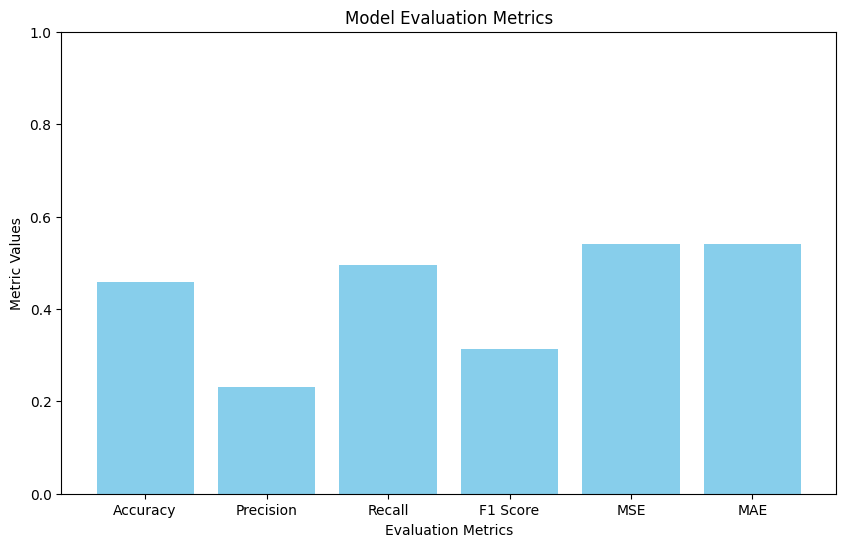

In [85]:
# Evaluation metrics data
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MSE', 'MAE']
metric_values = [accuracy, precision, recall, f1, mse, mae]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(evaluation_metrics, metric_values, color='skyblue')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Values')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Set y-axis limit for accuracy and other percentage metrics

# Save the plot as an image file
plt.savefig('evaluation_metrics_plot_1.png')

plt.show()

## **For Prediction**

In [64]:
model_path = '/kaggle/working/gcn_model_improved_graph_conv_state_dict.pth'  # Update with your model's path

In [65]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

ImprovedSAGEConvNet(
  (conv1): SAGEConv(102, 64, aggr=mean)
  (bn1): BatchNorm(64)
  (conv2): SAGEConv(64, 128, aggr=mean)
  (bn2): BatchNorm(128)
  (conv3): SAGEConv(128, 128, aggr=mean)
  (bn3): BatchNorm(128)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [87]:
smiles_list = ['C[C@@H]1O[C@H](CC[C@@H]1O[C@H]1C=CC(=O)[C@@H](O1)C)O[C@@]1(C)CC(=O)[C@]2([C@](C1)(O)C=CC1=C2C(=O)c2c(C1=O)c(O)c(cc2)[C@H]1C[C@@H](O)[C@@H]([C@H](O1)C)O[C@H]1CC[C@@H]([C@@H](O1)C)O)O', 'OC(=O)CC[C@@]1(C)[C@@H](CC[C@@]2([C@@H]1CC=C1[C@@]2(C)CC[C@@]2([C@H]1CC(C)(C)CC2)C(=O)O)C)C(O)(C)C','CO[C@H]1O[C@H](CC=C1CC/C=C(/CC/C=C(/CCC=C(C)C)\C)\C)[C@@H]1CC(=NC1=O)O' , 'CC(=O)O[C@@H]1C[C@]2(C)[C@H]3CC[C@]4([C@H](C3=CC[C@H]2[C@@H]([C@H]1O[C@@H]1O[C@@H](C)[C@@H]([C@H]([C@@H]1O)O)O)C)CC[C@@H]4[C@H](C(=O)S)CCC(=C)C(C)C)C']

In [88]:
# Convert SMILES to graph data
graph_data_list = [mol_to_graph(smiles, num_node_features=102) for smiles in smiles_list]

In [89]:
# Create a DataLoader
loader = DataLoader(graph_data_list, batch_size=32, shuffle=False)

In [90]:
predictions = []
with torch.no_grad():
    for data in loader:
        out = model(data)
        pred = out.argmax(dim=1)
        predictions.extend(pred.cpu().numpy())



In [91]:
print("Predictions:", predictions)

Predictions: [1, 1, 1, 1]


In [62]:
# Initialize variables for accuracy calculation
correct = 0
total = 0

# Iterate over the test DataLoader
for data in test_loader:
    with torch.no_grad():
        # Move data to the device (GPU if available)
        data = data.to(device)
        
        # Forward pass
        outputs = model(data)
        
        # Get predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Calculate accuracy
        total += data.y.size(0)
        correct += (predicted == data.y).sum().item()


In [56]:
import torch
from torch_geometric.data import Data
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GraphConv, BatchNorm, global_mean_pool
import torch.nn.functional as F
from torch.nn import Dropout

In [ ]:
# Define the GCN model architecture
class ImprovedGraphConvNet(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(ImprovedGraphConvNet, self).__init__()
        self.conv1 = GraphConv(num_node_features, 64)
        self.bn1 = BatchNorm(64)
        self.conv2 = GraphConv(64, 128)
        self.bn2 = BatchNorm(128)
        self.conv3 = GraphConv(128, 128)
        self.bn3 = BatchNorm(128)
        self.fc1 = torch.nn.Linear(128, 64)
        self.fc2 = torch.nn.Linear(64, num_classes)
        self.dropout = Dropout(0.5)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv3(x, edge_index)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = global_mean_pool(x, batch)  # Global mean pooling
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
features

In [ ]:
model.eval()

In [ ]:
new_smiles = ['C[C@@H]1O[C@H](CC[C@@H]1O[C@H]1C=CC(=O)[C@@H](O1)C)O[C@@]1(C)CC(=O)[C@]2([C@](C1)(O)C=CC1=C2C(=O)c2c(C1=O)c(O)c(cc2)[C@H]1C[C@@H](O)[C@@H]([C@H](O1)C)O[C@H]1CC[C@@H]([C@@H](O1)C)O)O', 'OC(=O)CC[C@@]1(C)[C@@H](CC[C@@]2([C@@H]1CC=C1[C@@]2(C)CC[C@@]2([C@H]1CC(C)(C)CC2)C(=O)O)C)C(O)(C)C','CO[C@H]1O[C@H](CC=C1CC/C=C(/CC/C=C(/CCC=C(C)C)\C)\C)[C@@H]1CC(=NC1=O)O']

In [ ]:
test_data_list = []
for smiles in new_smiles:
    data = mol_to_graph(smiles, [])  # Pass an empty list for features since you don't have them
    test_data_list.append(data)

In [ ]:
from torch_geometric.data import Data, Batch  # Import the Batch class



In [ ]:
test_data = Batch.from_data_list(test_data_list)

In [ ]:
device

In [ ]:
test_data = test_data.to(device)

In [ ]:
train_data_list

In [ ]:
test_data_list

In [ ]:
with torch.no_grad():
    output = model(test_data)
    predictions = torch.argmax(output, dim=1)